<H1>Probabilidad Discreta</H1>

En probabilidad discreta contamos con un conjunto finito o contablemente infinito de elementos y una función de masa de probabilidad sobre cada uno de los elementos. Para eventos binarios, si repetimos $n$ veces el experimento y obtenemos $k$ sucesos, se obtienen $C(n,k)={{n}\choose{k}}$ posibles combinaciones. 


In [1]:
import numpy as np

factorial = lambda n: 1 if n == 0 else n * factorial(n-1)

permutations = lambda n,r : np.int32(factorial(n)/factorial(n-r))

generalized_permutations = lambda n,r : np.int32(factorial(n)
                                                 /np.prod([factorial(i) for i in r]))

n_choose_k = lambda n,k :factorial(n)/(factorial(k)*factorial(n-k))

Suponga que los artı́culos de una lı́nea de producción pueden ser defectuosos
$D$ o no defectuosos $N$ y que se eligen al azar 3 productos para hacer control
de calidad. En Python, construya el espacio muestral $ \Omega = S_1 \times S_2 \times S_3$ para
este experimento, siendo $S_i = \{D, N\}$.

In [27]:
S={'D','N'}
O=[(s1,s2,s3) for s1 in S for s2 in S for s3 in S]
print(O)

[('N', 'N', 'N'), ('N', 'N', 'D'), ('N', 'D', 'N'), ('N', 'D', 'D'), ('D', 'N', 'N'), ('D', 'N', 'D'), ('D', 'D', 'N'), ('D', 'D', 'D')]


Supongamos que la probabilidad de encontrar un elemento defectuoso es
$P (D) = 0.2$. Determine la distribución para la cantidad de elementos defectu-
osos que es posible encontrar y calcule la probabilidad de encontrar 3 elementos
defectuosos al mismo tiempo.

In [30]:
binom = lambda x,n,p : n_choose_k(n,x)*p**x * (1-p)**(n-x)

prob=0.2
print('Probabilidad uniforme : {0:0.3f}'.format(1./len(O)))
print('Probabilidad 3 elementos defectuosos : {0:0.3f}'.format(binom(3,3,prob)))

Probabilidad uniforme : 0.125
Probabilidad 3 elementos defectuosos : 0.008


Cuál es la probabilidad de encontrar ya sea $2$ o menos elementos defectuosos:

In [4]:
print('Probabilidad acumulativa =< 2  : {0:0.2f}'.format(
        np.sum([binom(i,3,prob) for i in np.arange(0,3)])))

Probabilidad acumulativa =< 2  : 0.99


In [31]:
print('Probabilidad de 2 o 3 : {0:0.2f}'.format(binom(2,3,0.2)+binom(3,3,0.2)))

Probabilidad de 2 o 3 : 0.10


In [36]:
S={1,2,3,4,5,6}
O=[(s1,s2) for s1 in S for s2 in S]
print(O)
primes=[(s1,s2) for s1,s2 in O if s1+s2 in {2,3,5,7,11}]
print(primes)
print('Probabilidad de suma sea primo : {0:0.2f}'.format(len(primes)/len(O)))

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
[(1, 1), (1, 2), (1, 4), (1, 6), (2, 1), (2, 3), (2, 5), (3, 2), (3, 4), (4, 1), (4, 3), (5, 2), (5, 6), (6, 1), (6, 5)]
Probabilidad de suma sea primo : 0.42


<h1>Paradoja del Cumpleanos</h1>

La paradoja del cumpleanos estipula que en un grupo de $n=23$ personas existe una probabilidad de mas de un $50\%$ que dos personas se encuentren de cumpleanos en un mismo  dia. Esto contrasta con el principio del palomar, el cual estipula que se requieren un numero mayor $n>365$ para garantizar un $100\%$ de probabilidad. 

In [37]:
n=23
groups=n_choose_k(n,2)
print('En un grupo de {0:3} personas existen  {1:3} grupos de 2 personas.'.format(n,groups))

En un grupo de  23 personas existen  253.0 grupos de 2 personas.


En la practica es mas facil estimar la probabilidad que dos personas no se encuentren el cuampleanos el mismo dia $p=\frac{364}{365}$. Por lo tanto, si usamos el principio multiplicativo podemos calcular la probabilidad que ninguna persona se encuentre de cumpleanos el mismo dia $(X=0)$:

$$
P(X=0)=\frac{365}{365} \times \frac{364}{365} \times \cdot \times \frac{365-n+1}{365}\\
=\frac{365!}{365^n (365-n)!}\\
=\frac{n! P(365,n)}{365^n}
$$

La probabilidad puede ser calculada mediante:

$$
P(X>0)=1-P(X=0)
$$

In [38]:
birthday = lambda n : 1.0 - np.exp(np.sum(np.log([ (365-i) for i in range(n) ]))
                                   - n*np.log(365))

n=23
print('La probabilidad de un grupo de {0:3} es  p={1:.2f} '.format(n,birthday(n)))

La probabilidad de un grupo de  23 es  p=0.51 


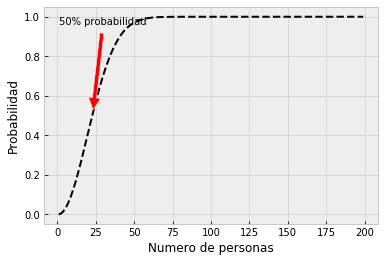

In [40]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

x=range(1,200)
y=[birthday(np.int32(i)) for i in x]

fig, ax = plt.subplots()
ax.plot(x,y,'k--')
ax.set_ylabel("Probabilidad")
ax.set_xlabel("Numero de personas")
ax.annotate('50% probabilidad',
            xy=(23,birthday(23)),
            xycoords='data',
            xytext=(1, 1),
            arrowprops=
                dict(facecolor='red', shrink=0.05),
                horizontalalignment='left',
                verticalalignment='top')
ax.grid(True)
plt.show()

In [49]:
n=55
print('La probabilidad de un grupo de {0:3} es  p={1:.2f} '.format(n,birthday(n)))

La probabilidad de un grupo de  55 es  p=0.99 


<h1>Distribucion de Poisson</h1>

La distribución de Poisson con paramero $\lambda$ tiene la siguiente forma:

$$
p(x=k;\lambda)=\frac{e^{-\lambda}\lambda^k}{k!}
$$

Si usamos una aproximacion de Poisson al problema del cumpleanos, obtenemos:

$$
P(X=0)=\operatorname{Poisson}\Big(0;\frac{{n}\choose{2}}{365}\Big)
$$

In [52]:
poiss = lambda x,lamb : (np.exp(-lamb)*lamb**x)/factorial(x)

n=23
groups=n_choose_k(n,2)
print('La probabilidad de un grupo de {0:3} es  p={1:.2f} '.format(n,poiss(0,groups/365)))


La probabilidad de un grupo de  23 es  p=0.50 


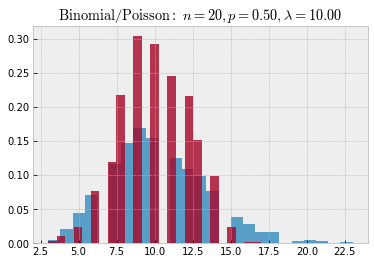

Entropy : 0.09532149074613618


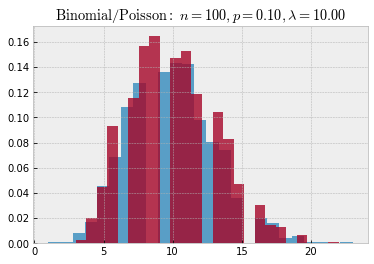

Entropy : 0.002689568923945595


In [53]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('bmh')


def poisson_approximation(n,p,n_samp=1000):
    samples_poisson=np.random.poisson(n*p,n_samp)
    samples_binomial=np.random.binomial(n,p,n_samp)
    fig, ax = plt.subplots()
    ax.hist(samples_poisson, histtype="stepfilled",
            bins=25, alpha=0.8, density=True)
    ax.hist(samples_binomial, histtype="stepfilled",
            bins=25, alpha=0.8, density=True)
    ax.set_title(r'$\mathrm{Binomial/Poisson:}\ n={%d},p=%0.2f,\lambda=%0.2f$'%(n,p,n*p))
    plt.show()

n=20
p=0.5
poisson_approximation(n,p)
x1=[binom(i,n,p) for i in range(0,n)]
x2=[poiss(i,n*p) for i in range(0,n)]
print('Entropy : {0}'.format(stats.entropy(x1,x2)))

n=100
p=0.1
poisson_approximation(n,p)
x1=[binom(i,n,p) for i in range(0,n)]
x2=[poiss(i,n*p) for i in range(0,n)]
print('Entropy : {0}'.format(stats.entropy(x1,x2)))



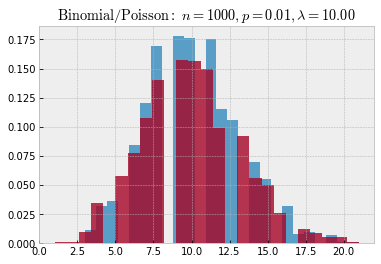

Entropy : 2.5176348511866736e-05


In [58]:
from scipy.special import gammaln 

# log (factorial(n)) = gammaln (n+1)
log_n_choose_k = lambda n,k : (gammaln(n+1) - (gammaln(k+1) + gammaln(n-k+1)))

log_binom = lambda x,n,p : log_n_choose_k(n,x)+x*np.log(p) + (n-x)*np.log(1.0-p)

log_poiss = lambda x,lamb : (-lamb+x*np.log(lamb))-gammaln(x+1)

n=1000
p=0.01
poisson_approximation(n,p)
x1=np.exp([log_binom(i,n,p) for i in range(0,100)])
x2=np.exp([log_poiss(i,n*p) for i in range(0,100)])
print('Entropy : {0}'.format(stats.entropy(x1,x2)))



In [59]:
from scipy.special import gammaln 

gammaln(1000+1)

5912.128178488164

# Tarea 

1. Sunpongamos que $1$ en $5000$ ampolletas es defectuosa. Sea $X$ el numero de ampolletas defectuosas en un grupo de $10000$. Cual es la probabilidad que 3 ampolletas sean defectuosas?

In [64]:
n=10000
p=1/5000
print('Probabilidad Poisson : {0}'.format(np.exp(log_poiss(3,n*p))))

print('Probabilidad Binomial : {0}'.format(np.exp(log_binom(3,n,p))))

Probabilidad Poisson : 0.18044704431548356
Probabilidad Binomial : 0.1804650914272278


In [74]:
prob=(np.prod([n-i for i in range(3)])/6)*p**3 * (1-p)**(n-3)  
print('Probabilidad Binomial : {0}'.format(prob))

Probabilidad Binomial : 0.18046509142627645
